In [367]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

Nessa parte eu estou apenas ajeitando o csv, e analisando se a valores faltando

In [368]:
df = pd.read_csv("energy_efficiency_data.csv")
df.columns = [
    "relative_compactness",
    "surface_area",
    "wall_area",
    "roof_area",
    "overall_height",
    "orientation",
    "glazing_area",
    "glazing_area_distribution",
    "heating_load",
    "cooling_load"
]


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [370]:
df['relative_compactness'].value_counts()

relative_compactness
0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: count, dtype: int64

In [371]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


aqui eu estou analisando a correlação das variaveis para decidir o meu X e Y

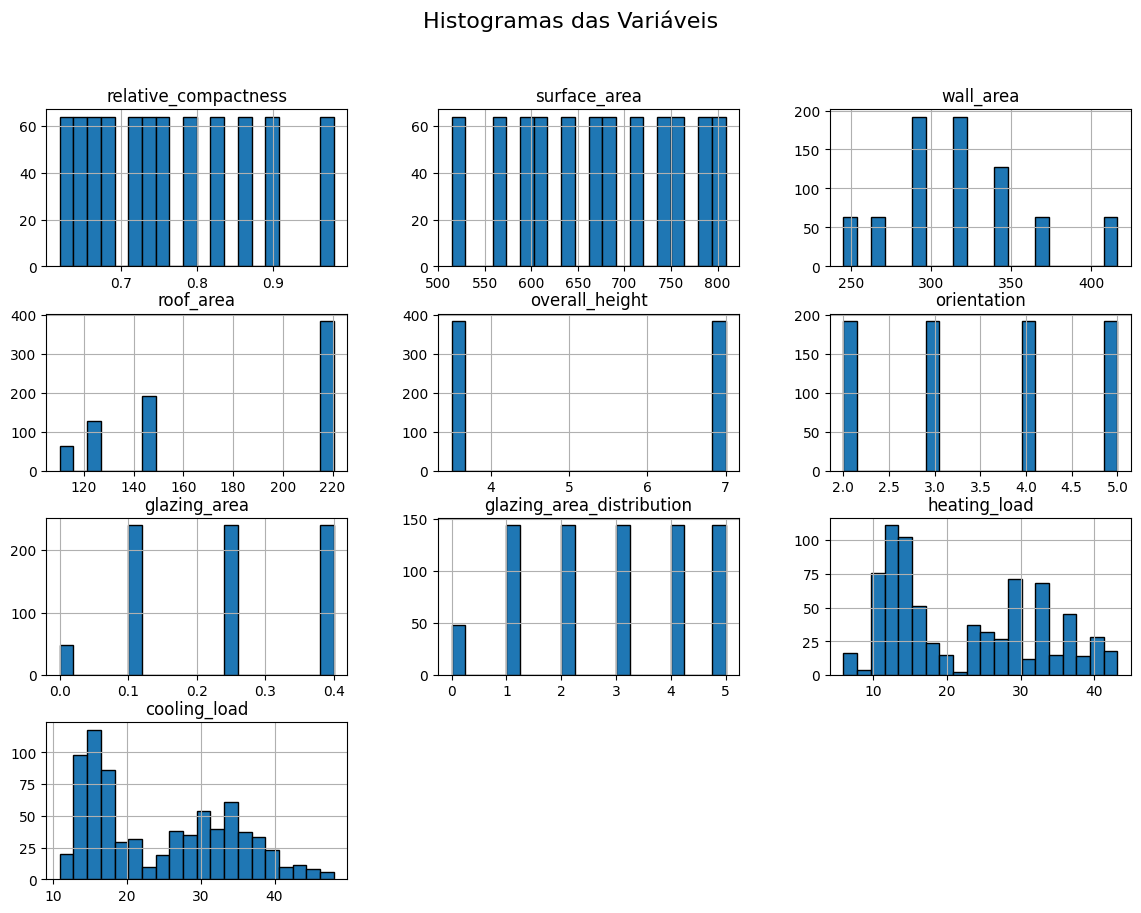

In [372]:
df.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle("Histogramas das Variáveis", fontsize=16)
plt.show()

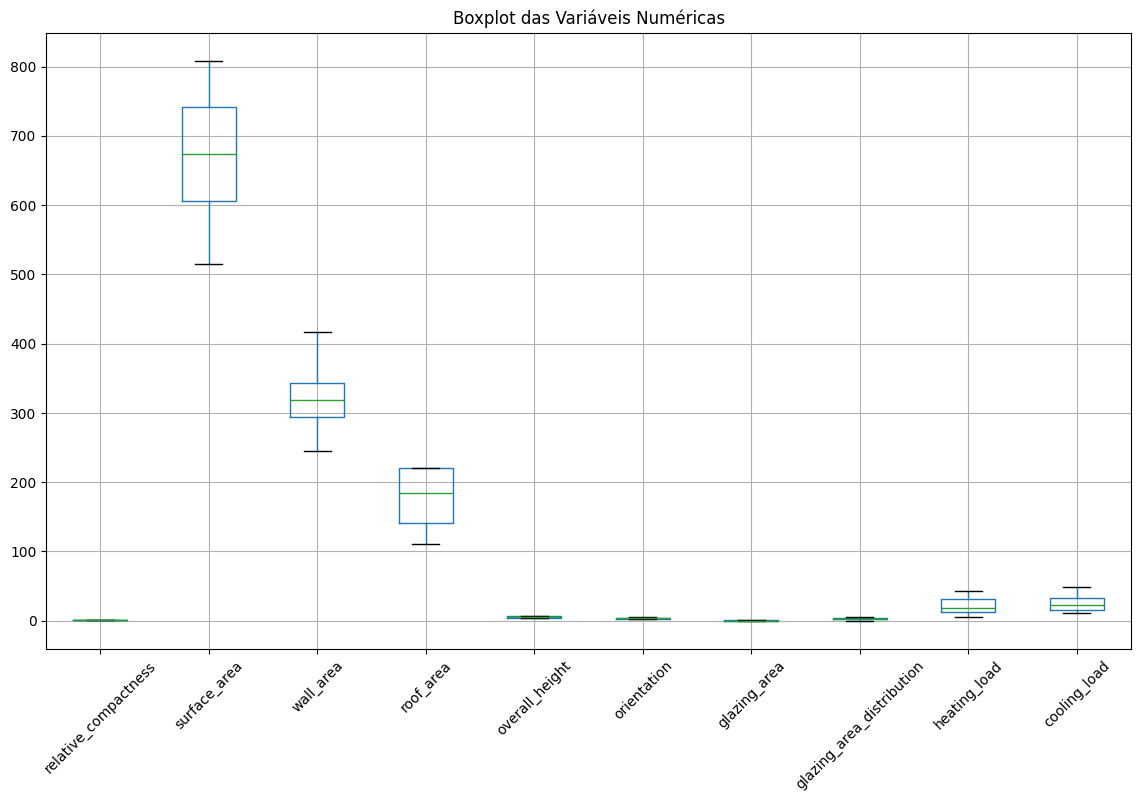

In [373]:
plt.figure(figsize=(14, 8))
df.boxplot(rot=45)
plt.title("Boxplot das Variáveis Numéricas")
plt.show()

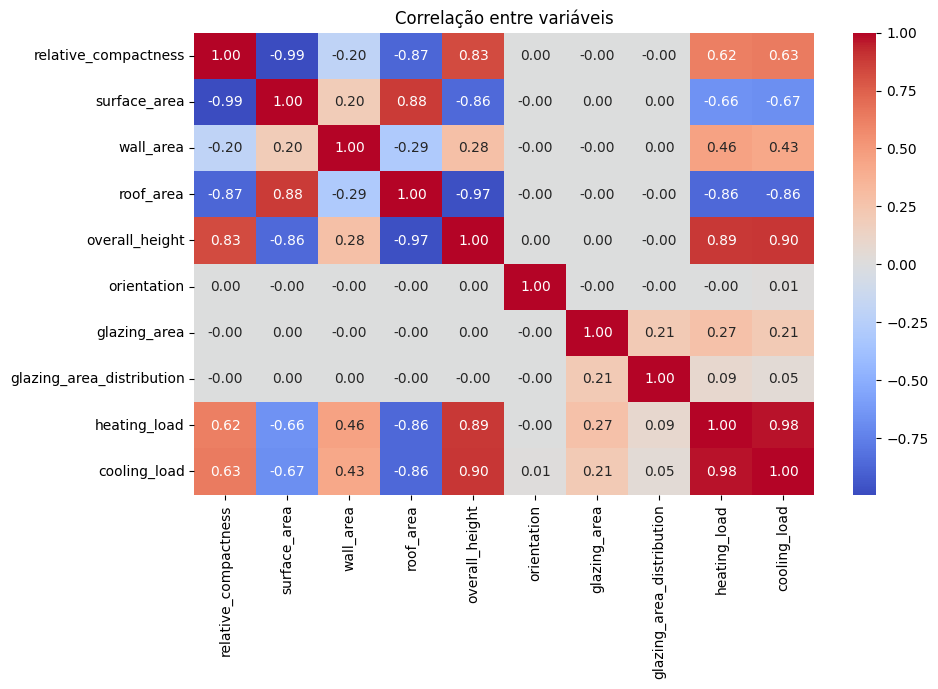

In [374]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação entre variáveis")
plt.show()

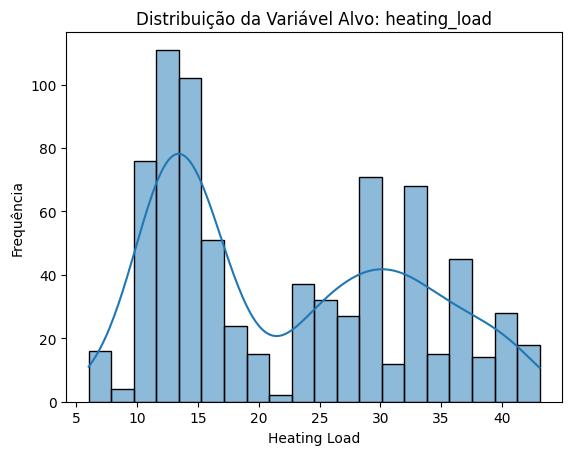

In [375]:
sns.histplot(df["heating_load"], kde=True, bins=20)
plt.title("Distribuição da Variável Alvo: heating_load")
plt.xlabel("Heating Load")
plt.ylabel("Frequência")
plt.show()

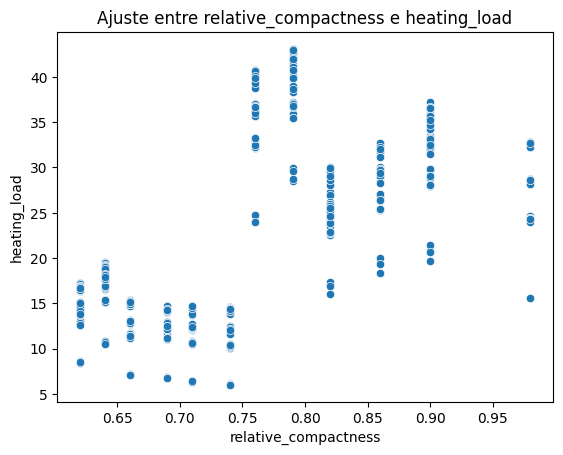

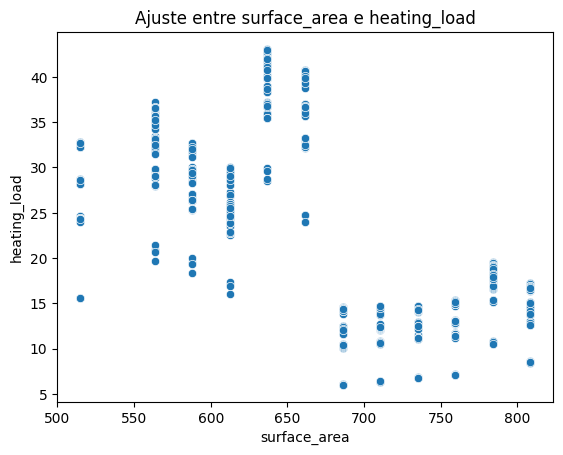

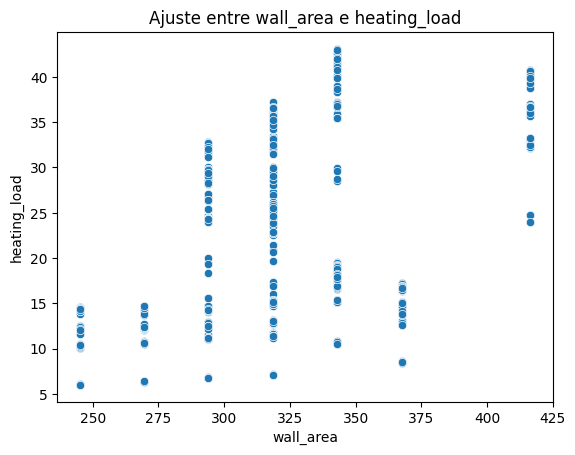

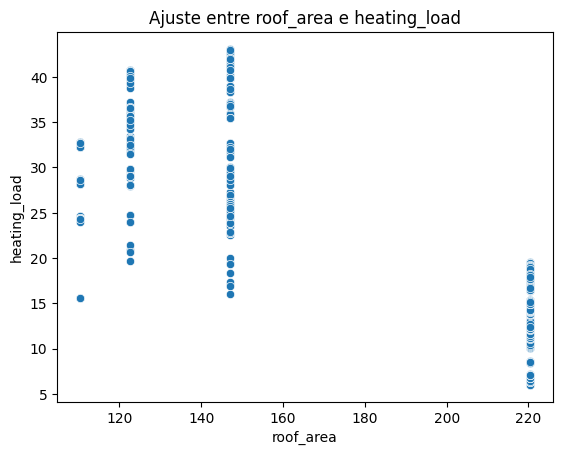

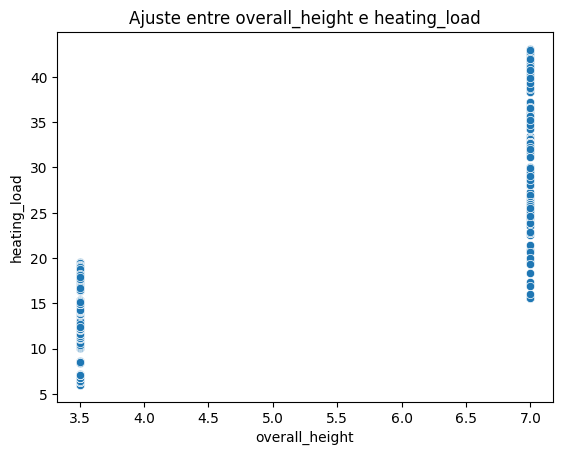

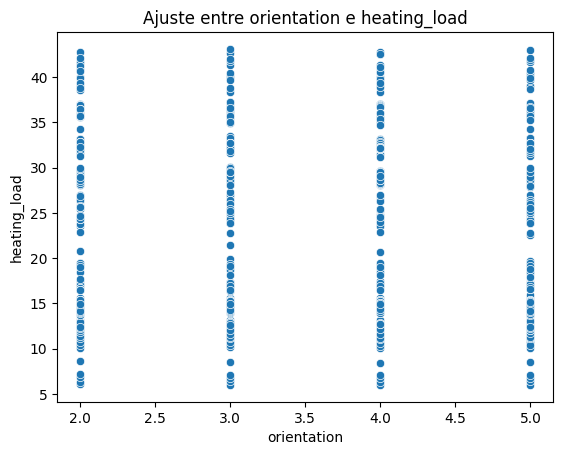

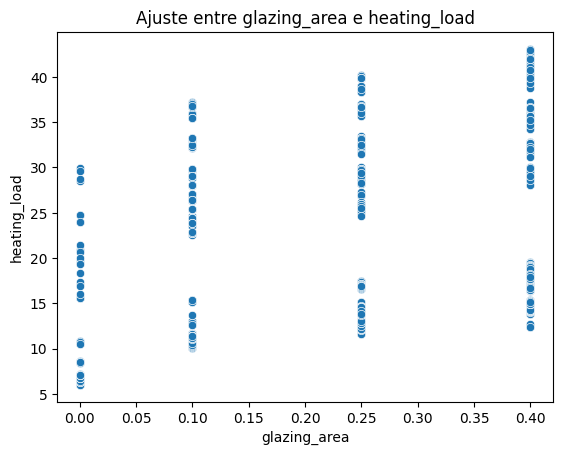

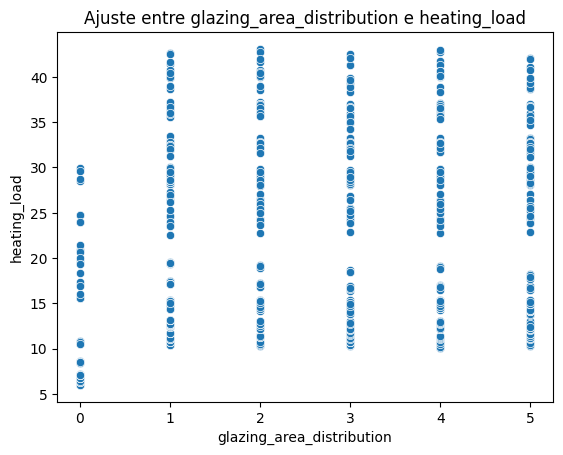

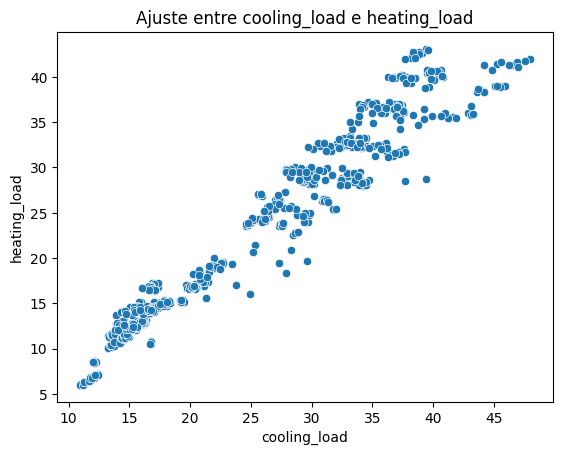

In [376]:
for col in df.columns:
    if col != "heating_load":
        plt.figure()
        sns.scatterplot(data=df, x=col, y="heating_load")
        plt.title(f"Ajuste entre {col} e heating_load")
        plt.show()

In [377]:
df["Heating_Class"] = pd.qcut(df["heating_load"], q=3, labels=["Baixo", "Médio", "Alto"])
df["Heating_Class"].value_counts()


Heating_Class
Baixo    257
Alto     256
Médio    255
Name: count, dtype: int64

In [378]:
X = df.drop(["heating_load", "cooling_load", "Heating_Class"], axis=1)
y = df["Heating_Class"]


In [379]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [380]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [381]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

acc_nb  = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb, average='weighted')
rec_nb  = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb   = f1_score(y_test, y_pred_nb, average='weighted')

print("Naive Bayes")
print("Accuracy:", acc_nb)
print("Precision:", prec_nb)
print("Recall:", rec_nb)
print("F1 Score:", f1_nb)

cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb


Naive Bayes
Accuracy: 0.6688311688311688
Precision: 0.4483963671463671
Recall: 0.6688311688311688
F1 Score: 0.5365620687321887


c:\Users\dudup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


array([[51,  0,  0],
       [ 0, 52,  0],
       [29, 22,  0]])

Aqui começa o modelo de regressão linear simples, eu escolhi como variaveis X=overall_height e Y=heating_load

In [382]:
X = df[["overall_height"]]
y = df["heating_load"]

In [383]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [384]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

modelo_sm = sm.OLS(y_train, X_train_sm).fit()
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           heating_load   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2311.
Date:                qua, 10 dez 2025   Prob (F-statistic):          6.04e-210
Time:                        23:34:19   Log-Likelihood:                -1807.8
No. Observations:                 614   AIC:                             3620.
Df Residuals:                     612   BIC:                             3629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.5006      0.585     -7.

In [385]:
y_pred = modelo_sm.predict(X_test_sm)


In [386]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 3.644058243081424
RMSE: 4.656162404854274
R²: 0.7920030126075434


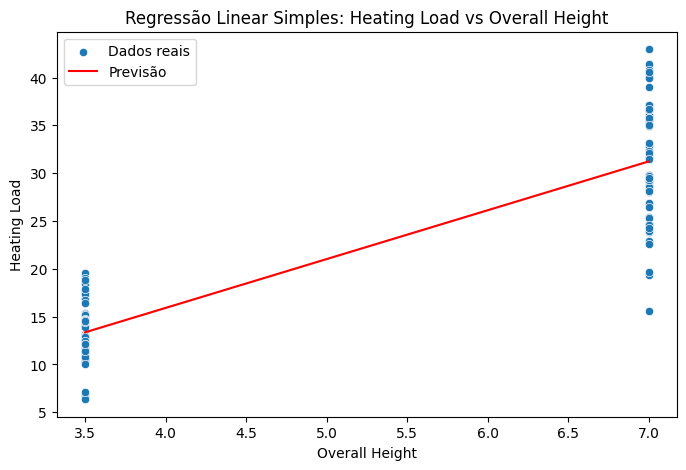

In [387]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test["overall_height"], y=y_test, label="Dados reais")
sns.lineplot(x=X_test["overall_height"], y=y_pred, label="Previsão", color="red")
plt.xlabel("Overall Height")
plt.ylabel("Heating Load")
plt.title("Regressão Linear Simples: Heating Load vs Overall Height")
plt.show()


aqui eu decidi fazer outro modelo trocando o X porque o overall_height tinha apenas dois tipos de resultado e eu queria ver como mudaria se o X tivesse resultados mais diversos 

In [388]:
X = df[["relative_compactness"]]
y = df["heating_load"]

In [389]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [390]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

modelo_sm = sm.OLS(y_train, X_train_sm).fit()
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           heating_load   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     401.3
Date:                qua, 10 dez 2025   Prob (F-statistic):           4.99e-69
Time:                        23:34:19   Log-Likelihood:                -2133.0
No. Observations:                 614   AIC:                             4270.
Df Residuals:                     612   BIC:                             4279.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -23.5592 

In [391]:
y_pred = modelo_sm.predict(X_test_sm)


In [392]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 6.551686403981241
RMSE: 8.229441468439212
R²: 0.35025712424531263


a previsão desse chegou em um numero mais alto pq os dados variam mais e a correlação e mais fraca

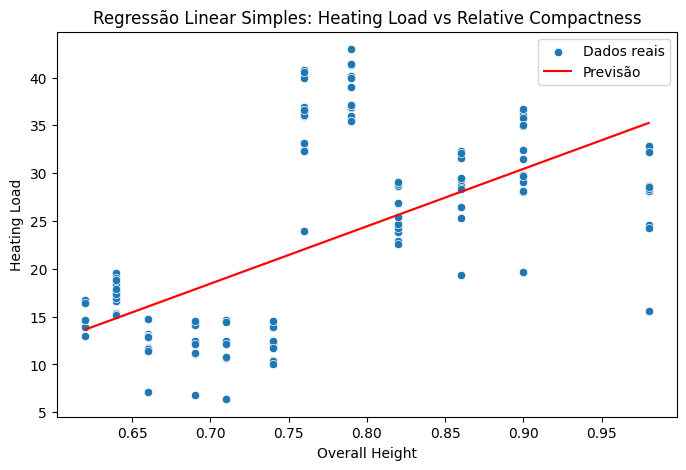

In [393]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test["relative_compactness"], y=y_test, label="Dados reais")
sns.lineplot(x=X_test["relative_compactness"], y=y_pred, label="Previsão", color="red")
plt.xlabel("Overall Height")
plt.ylabel("Heating Load")
plt.title("Regressão Linear Simples: Heating Load vs Relative Compactness")
plt.show()

aqui começa a regressão multipla

In [394]:
# Selecionar Y
y = df["heating_load"]

# Selecionar variáveis independentes (X)
X = df[[
    "relative_compactness",
    "surface_area",
    "wall_area",
    "roof_area",
    "overall_height",
    "orientation",
    "glazing_area",
    "glazing_area_distribution"
]]


In [395]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [396]:

# adicionar constante
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

modelo_multiplo = sm.OLS(y_train, X_train_sm).fit()
print(modelo_multiplo.summary())


                            OLS Regression Results                            
Dep. Variable:           heating_load   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     957.3
Date:                qua, 10 dez 2025   Prob (F-statistic):          9.39e-323
Time:                        23:34:20   Log-Likelihood:                -1523.5
No. Observations:                 614   AIC:                             3063.
Df Residuals:                     606   BIC:                             3098.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [397]:
y_pred = modelo_multiplo.predict(X_test_sm)

In [398]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2.1820470221289168
RMSE: 3.025423582774407
R²: 0.9121840951546452


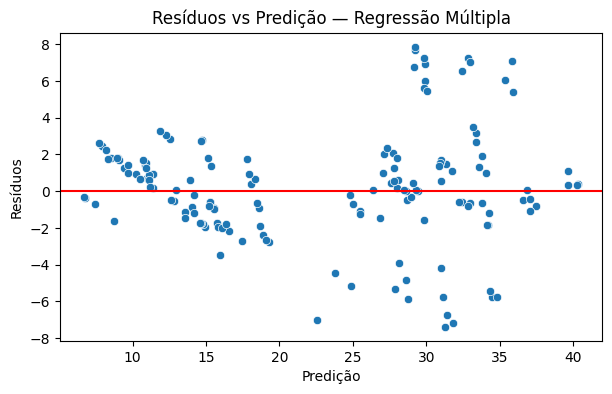

In [399]:
residuos = y_test - y_pred

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red')
plt.xlabel("Predição")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Predição — Regressão Múltipla")
plt.show()


In [400]:
residuos = modelo_multiplo.resid
ajustados = modelo_multiplo.fittedvalues

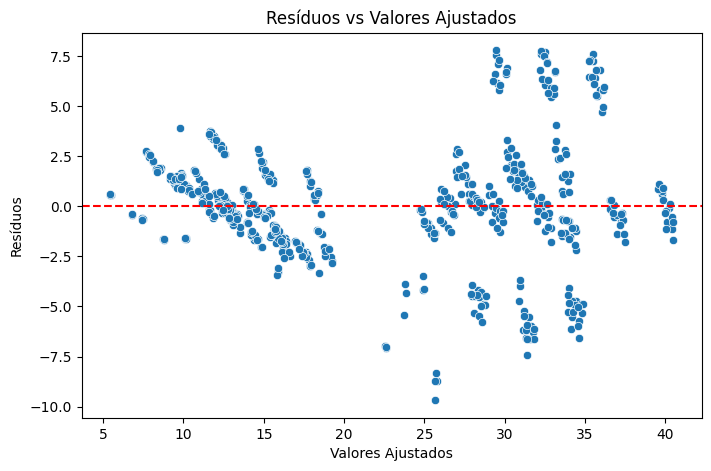

In [401]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=ajustados, y=residuos)
plt.axhline(0, color="red", linestyle="--")
plt.title("Resíduos vs Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.show()

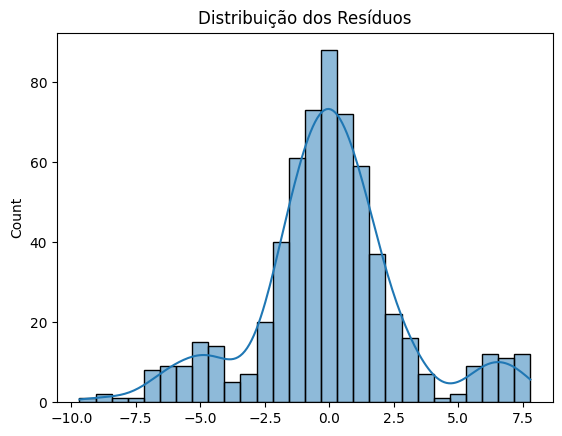

In [402]:
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()


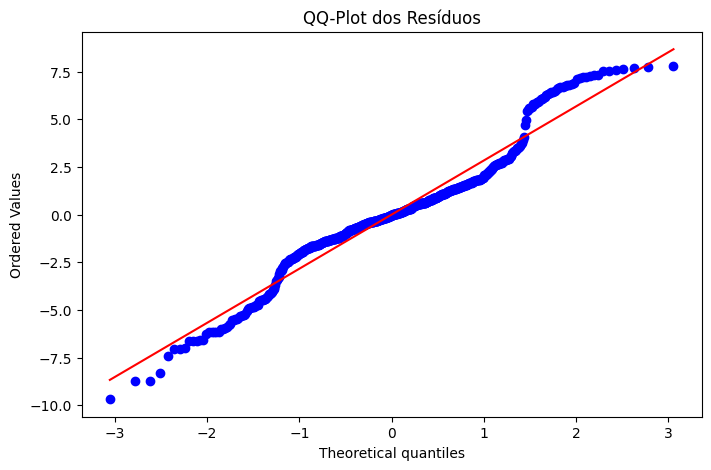

In [403]:
plt.figure(figsize=(8, 5))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("QQ-Plot dos Resíduos")
plt.show()

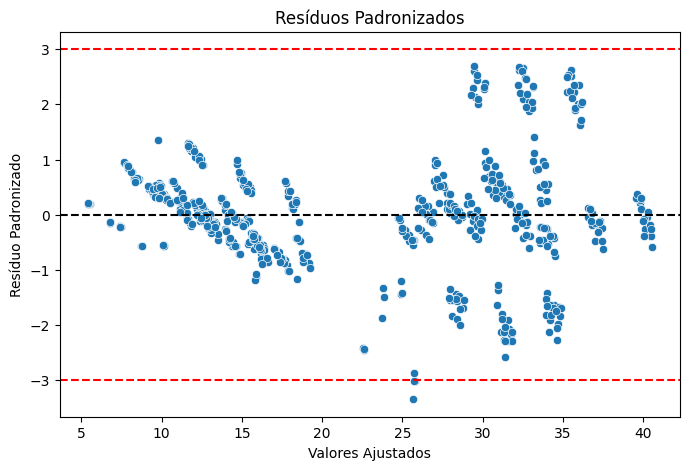

In [404]:
resid_pad = residuos / np.std(residuos)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=ajustados, y=resid_pad)
plt.axhline(0, color='black', linestyle="--")
plt.axhline(3, color='red', linestyle="--")
plt.axhline(-3, color='red', linestyle="--")
plt.title("Resíduos Padronizados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduo Padronizado")
plt.show()

Foram avaliadas as suposições do modelo por meio de quatro gráficos principais.
O gráfico de Resíduos vs Ajustados verifica homocedasticidade; o histograma e o QQ-plot avaliam se os resíduos se aproximam de uma distribuição normal; e o gráfico dos resíduos padronizados ajuda a identificar pontos influentes. Esses diagnósticos indicam se o modelo linear múltiplo atende às suposições teóricas e orientam ajustes — como modelos polinomiais ou transformações.

aqui eu checo a colinearidade das variaveis com o VIF, e retiro as 3 maiores, e refaço o modelo

In [405]:
# Criar um dataframe temporário
X_vif = X.copy()
X_vif = sm.add_constant(X_vif)

vif = pd.DataFrame()
vif["Variável"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i)
              for i in range(X_vif.shape[1])]

vif

c:\Users\dudup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variável,VIF
0,const,3.231389e+04
1,relative_compactness,1.055241e+02
2,surface_area,inf
3,wall_area,inf
4,roof_area,inf
5,overall_height,3.120547e+01
6,orientation,1.000000e+00
7,glazing_area,1.047508e+00
8,glazing_area_distribution,1.047508e+00


In [406]:
# Selecionar Y
y = df["heating_load"]

# Selecionar variáveis independentes (X)
X = df[[
    "relative_compactness",
    "overall_height",
    "orientation",
    "glazing_area",
    "glazing_area_distribution"
]]

aqui eu checo de novo, mas como elas estão em um nivel aceitavel eu deixo todas lá

In [407]:
# Criar um dataframe temporário
X_vif = X.copy()
X_vif = sm.add_constant(X_vif)

vif = pd.DataFrame()
vif["Variável"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i)
              for i in range(X_vif.shape[1])]

vif

,Variável,VIF
0,const,96.606788
1,relative_compactness,3.176273
2,overall_height,3.176273
3,orientation,1.000000
4,glazing_area,1.047508
5,glazing_area_distribution,1.047508


In [408]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [409]:
# adicionar constante
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

modelo_multiplo2 = sm.OLS(y_train, X_train_sm).fit()
print(modelo_multiplo2.summary())


                            OLS Regression Results                            
Dep. Variable:           heating_load   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1177.
Date:                qua, 10 dez 2025   Prob (F-statistic):          8.02e-310
Time:                        23:34:20   Log-Likelihood:                -1560.9
No. Observations:                 614   AIC:                             3134.
Df Residuals:                     608   BIC:                             3160.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

aqui dava pra tirar "orientation", pq o coef dela é bem baixo, logo ela não impacta tanto no resultado

In [410]:
y_pred = modelo_multiplo2.predict(X_test_sm)

In [411]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2.473581154632809
RMSE: 3.1574632839346988
R²: 0.9043516630733448


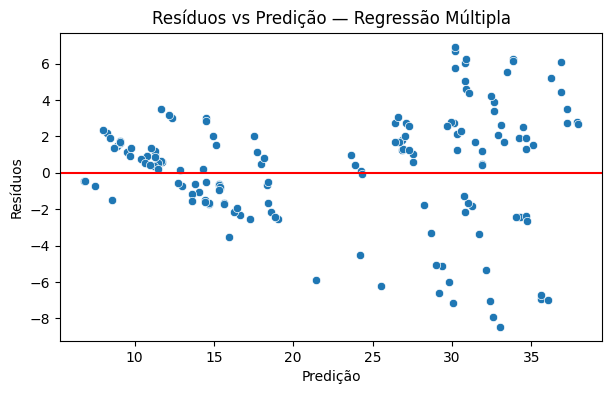

In [412]:
residuos = y_test - y_pred

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red')
plt.xlabel("Predição")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Predição — Regressão Múltipla")
plt.show()

In [413]:
residuos = modelo_multiplo2.resid
ajustados = modelo_multiplo2.fittedvalues

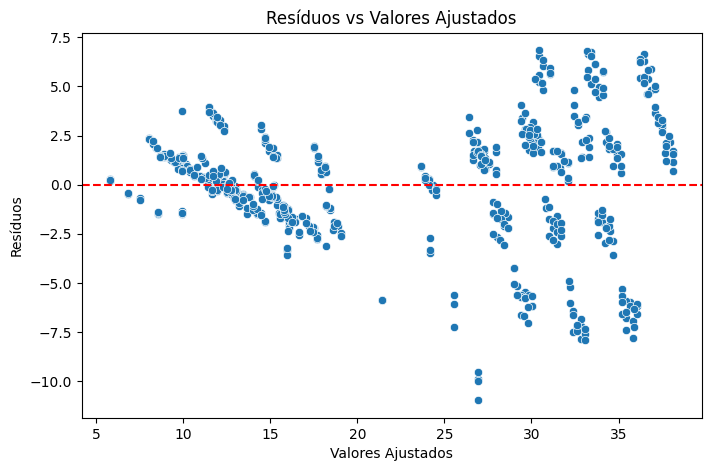

In [414]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=ajustados, y=residuos)
plt.axhline(0, color="red", linestyle="--")
plt.title("Resíduos vs Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.show()

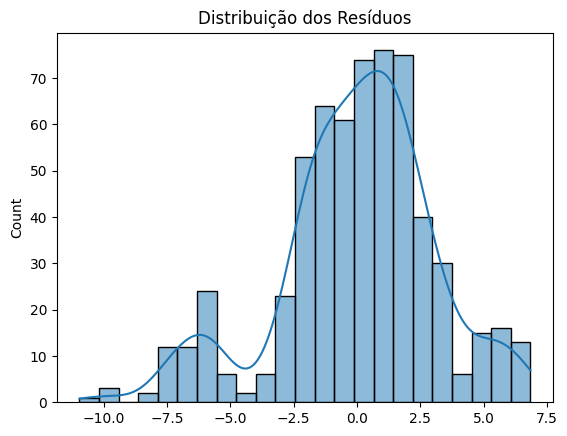

In [415]:
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()

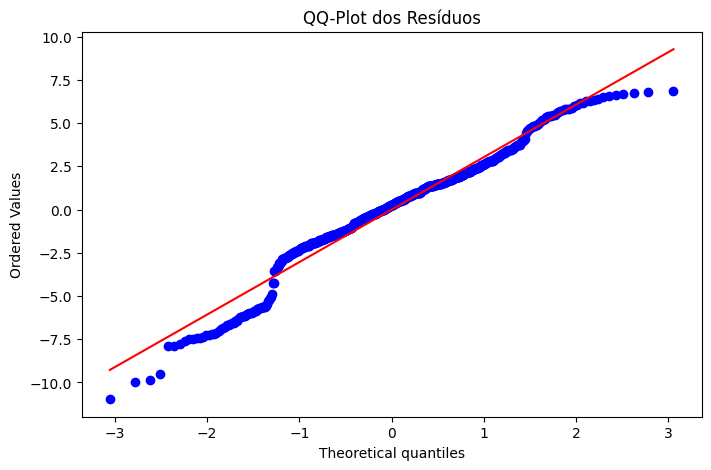

In [416]:
plt.figure(figsize=(8, 5))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("QQ-Plot dos Resíduos")
plt.show()

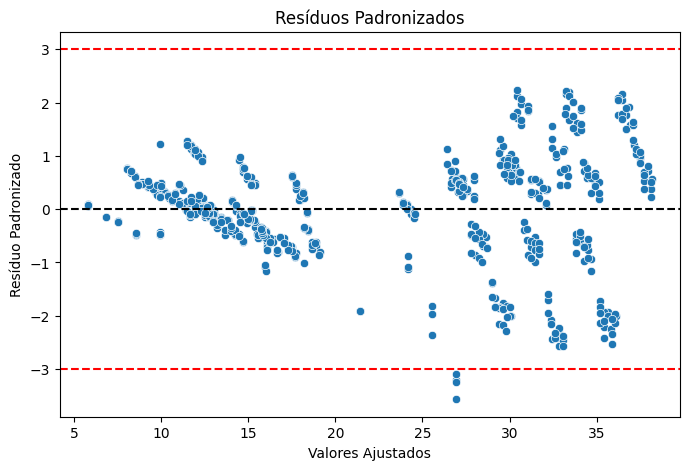

In [417]:
resid_pad = residuos / np.std(residuos)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=ajustados, y=resid_pad)
plt.axhline(0, color='black', linestyle="--")
plt.axhline(3, color='red', linestyle="--")
plt.axhline(-3, color='red', linestyle="--")
plt.title("Resíduos Padronizados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduo Padronizado")
plt.show()

aqui eu vou começar a regressão polinomial

In [418]:
X = df[[
    "relative_compactness",
    "overall_height",
    "glazing_area",
    "glazing_area_distribution"
]]

y = df["heating_load"]


aqui eu estou usando o BIC para ver qual grau de função pe melhor para usar

In [419]:
resultados = []

for grau in range(1, 20):  # Testar graus de 1 até 9
    poly = PolynomialFeatures(degree=grau, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Adicionar constante
    X_poly_const = sm.add_constant(X_poly)

    # Ajustar modelo OLS
    model = sm.OLS(y, X_poly_const).fit()

    resultados.append({
        "Grau": grau,
        "AIC": model.aic,
        "BIC": model.bic,
        "R²": model.rsquared,
        "R² Ajustado": model.rsquared_adj,
        "Número de parâmetros": X_poly_const.shape[1]
    })

df_resultados = pd.DataFrame(resultados)
df_resultados

,Grau,AIC,BIC,R²,R² Ajustado,Número de parâmetros
0,1,3922.479794,3945.698743,0.906081,0.905589,5
1,2,3735.326186,3800.339242,0.928098,0.926859,15
2,3,3650.070539,3789.384231,0.938279,0.935854,35
3,4,3169.172367,3415.293223,0.968920,0.966660,70
4,5,1252.666908,1628.813876,0.997617,0.997340,126
5,6,1015.752870,1531.213530,0.998381,0.998110,210
6,7,975.912818,1588.893063,0.998545,0.998245,330
7,8,955.665229,1605.795792,0.998612,0.998305,495
8,9,921.153378,1580.571520,0.998680,0.998383,715
9,10,919.840960,1574.615313,0.998679,0.998384,1001


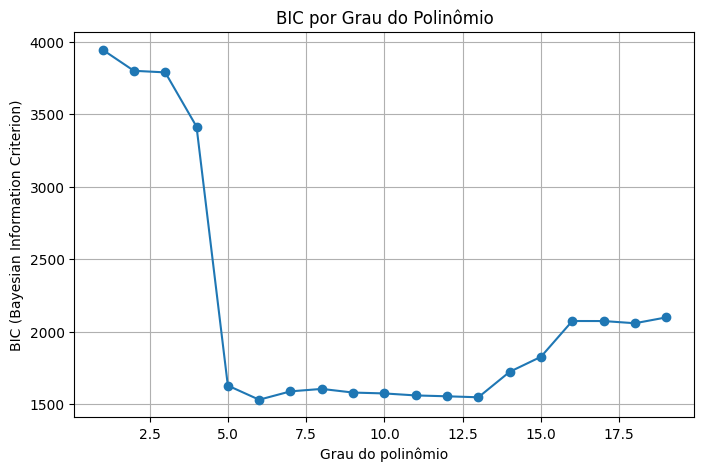

In [420]:
plt.figure(figsize=(8,5))
plt.plot(df_resultados["Grau"], df_resultados["BIC"], marker="o")
plt.title("BIC por Grau do Polinômio")
plt.xlabel("Grau do polinômio")
plt.ylabel("BIC (Bayesian Information Criterion)")
plt.grid(True)

plt.show()

In [421]:
melhor = df_resultados.loc[df_resultados["BIC"].idxmin()]
melhor

Grau                       6.000000
AIC                     1015.752870
BIC                     1531.213530
R²                         0.998381
R² Ajustado                0.998110
Número de parâmetros     210.000000
Name: 5, dtype: float64

In [422]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [423]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [424]:
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [425]:
y_pred_poly = modelo_poly.predict(X_test_poly)


In [426]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("MAE:", mae_poly)
print("RMSE:", rmse_poly)
print("R²:", r2_poly)


MAE: 2.020321958971699
RMSE: 2.854147744654591
R²: 0.9218455509159138


In [427]:
poly.get_feature_names_out(X.columns)


array(['relative_compactness', 'overall_height', 'glazing_area',
       'glazing_area_distribution', 'relative_compactness^2',
       'relative_compactness overall_height',
       'relative_compactness glazing_area',
       'relative_compactness glazing_area_distribution',
       'overall_height^2', 'overall_height glazing_area',
       'overall_height glazing_area_distribution', 'glazing_area^2',
       'glazing_area glazing_area_distribution',
       'glazing_area_distribution^2'], dtype=object)

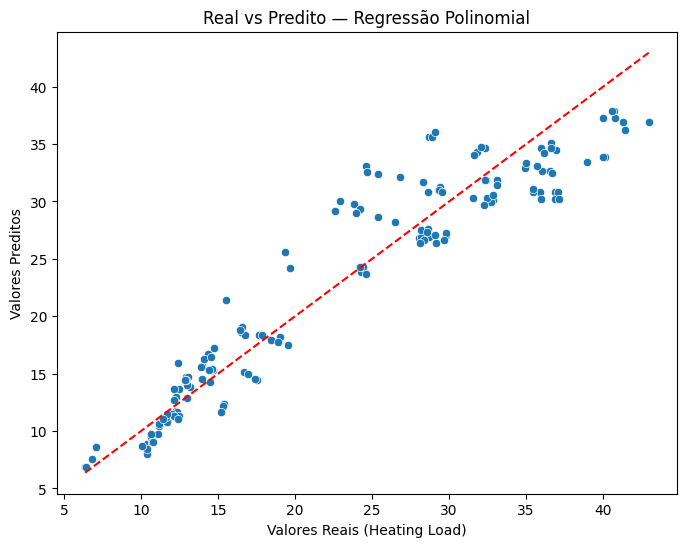

In [434]:
_pred = modelo_poly.predict(X_test_poly)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reais (Heating Load)")
plt.ylabel("Valores Preditos")
plt.title("Real vs Predito — Regressão Polinomial")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()

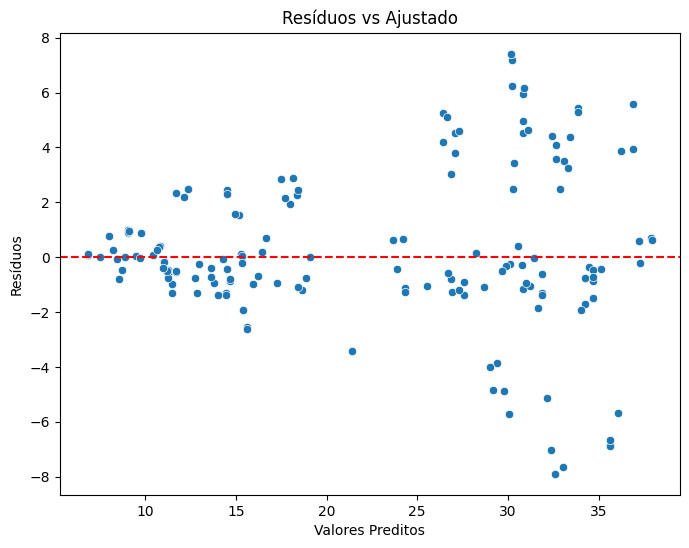

In [429]:
residuos = y_test - y_pred_poly

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustado")
plt.show()


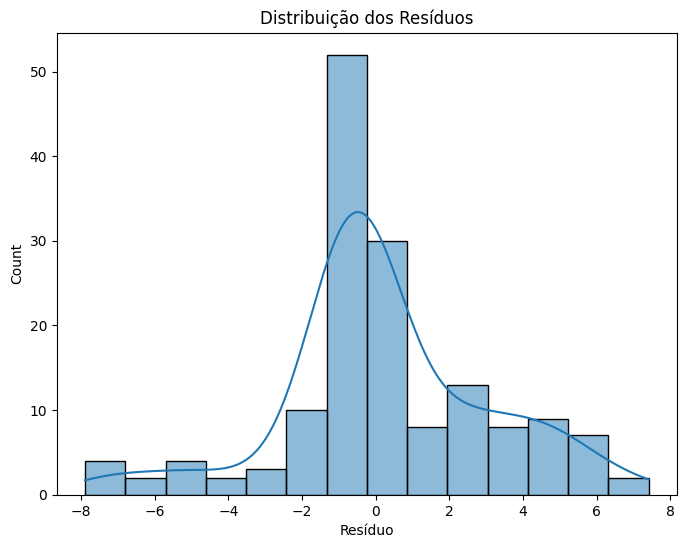

In [430]:
plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True)
plt.xlabel("Resíduo")
plt.title("Distribuição dos Resíduos")
plt.show()


<Figure size 800x600 with 0 Axes>

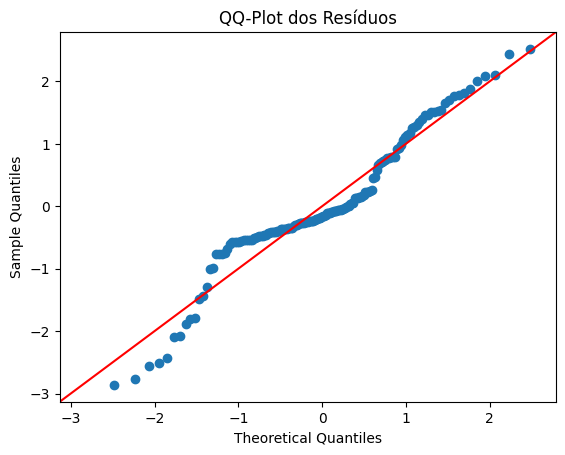

In [431]:

plt.figure(figsize=(8,6))
sm.qqplot(residuos, line='45', fit=True)
plt.title("QQ-Plot dos Resíduos")
plt.show()


Nesta análise, testamos diferentes modelos estatísticos para prever Heating Load, uma medida crucial de eficiência energética em edificações. As variáveis preditoras incluíram características estruturais como Surface Area, Wall Area, Roof Area, Glazing Area e Overall Height.

A análise seguiu as etapas clássicas:

Exploração dos dados (EDA)

Regressão Linear Simples

Regressão Linear Múltipla

Regressão Polinomial

Avaliação com BIC e diagnóstico de resíduos

Desempenho Geral

A Regressão Linear Simples apresentou um ajuste limitado, indicando que apenas uma variável não explica adequadamente o comportamento do Heating Load.

A Regressão Múltipla melhorou substancialmente o desempenho, revelando que a carga térmica depende de múltiplos fatores simultaneamente.

A Regressão Polinomial apresentou o melhor desempenho, com aumento expressivo no R² e redução no RMSE. O BIC identificou o grau ótimo do modelo, equilibrando complexidade e capacidade de generalização.

Validação e Resíduos

Os gráficos de diagnóstico mostraram que:

Os resíduos estão aproximadamente distribuídos de forma normal;

Não há comportamento fortemente heterocedástico;

O QQ-plot confirma que o modelo polinomial não viola severamente as suposições do modelo linear generalizado.

Conclusão Final

O modelo Polinomial de grau ótimo (via BIC) apresentou o melhor equilíbrio entre precisão e simplicidade, sendo o mais adequado para prever Heating Load neste conjunto de dados.

Portanto, a utilização de modelos não lineares é recomendada para problemas envolvendo energia térmica em edificações, dado que as relações entre as variáveis são intrinsecamente não lineares.